In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
%matplotlib inline

In [12]:
blob_df = pd.read_csv("blob.csv")
dart_df = pd.read_csv("dart.csv")
outliers_df = pd.read_csv("outliers.csv")
spiral2_df = pd.read_csv("spiral2.csv")
basic2_df = pd.read_csv("basic2.csv")
boxes3_df = pd.read_csv("boxes3.csv")

In [13]:
df_blob_DBScan = blob_df.copy()
df_dart_DBScan = dart_df.copy()
df_basic2_DBScan = basic2_df.copy()
df_outliers_DBScan = outliers_df.copy()
df_spiral2_DBScan = spiral2_df.copy()
df_boxes3_DBScan = boxes3_df.copy()

In [14]:
blob_df

,x,y,color
0,199.115034,72.641121,1
1,196.880523,247.744708,2
2,88.426271,233.962425,2
3,118.578789,264.044188,2
4,249.572490,260.896521,0
...,...,...,...
4081,124.085168,168.807922,3
4082,243.835577,216.936490,0
4083,226.728155,136.945680,1
4084,225.831882,95.884561,1


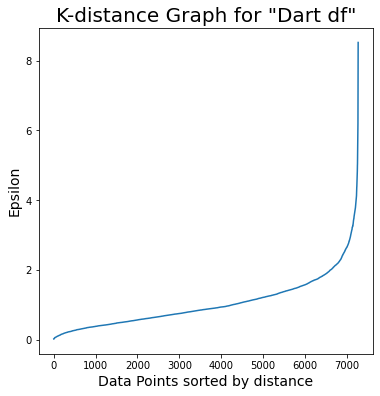

In [15]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=4)
nbrs = nn.fit(df_dart_DBScan)
distances, indices = nbrs.kneighbors(df_dart_DBScan)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(6,6))
plt.plot(distances)
plt.title('K-distance Graph for "Dart df"',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [16]:
df_blob_DBScan.drop(['color'], axis = 1, inplace =True)
df_dart_DBScan.drop(['color'], axis = 1, inplace =True)
df_basic2_DBScan.drop(['color'], axis = 1, inplace =True)
df_outliers_DBScan.drop(['color'], axis = 1, inplace =True)
df_spiral2_DBScan.drop(['color'], axis = 1, inplace =True)
df_boxes3_DBScan.drop(['color'], axis = 1, inplace =True)

In [17]:
# Training model
from sklearn.cluster import DBSCAN

DBScan_blob = DBSCAN(eps=13, min_samples=45, metric='euclidean')
DBScan_dart = DBSCAN(eps=8, min_samples=4, metric='euclidean')
DBScan_basic = DBSCAN(eps=15, min_samples=4, metric='euclidean')
DBScan_outliers = DBSCAN(eps=20, min_samples=4, metric='euclidean')
DBScan_spiral2 = DBSCAN(eps=5.7, min_samples=4, metric='euclidean')
DBScan_boxes3 = DBSCAN(eps=6, min_samples=4, metric='euclidean')

y_DBScan_blob = DBScan_blob.fit_predict(df_blob_DBScan)
y_DBScan_dart = DBScan_dart.fit_predict(df_dart_DBScan)
y_DBScan_basic = DBScan_basic.fit_predict(df_basic2_DBScan)
y_DBScan_outliers = DBScan_outliers.fit_predict(df_outliers_DBScan)
y_DBScan_spiral2 = DBScan_spiral2.fit_predict(df_spiral2_DBScan)
y_DBScan_boxes3 = DBScan_boxes3.fit_predict(df_boxes3_DBScan)

In [18]:
# Creating 'Cluster' columns in data sets
df_blob_DBScan['Cluster'] = y_DBScan_blob
df_dart_DBScan['Cluster'] = y_DBScan_dart
df_basic2_DBScan['Cluster'] = y_DBScan_basic
df_outliers_DBScan['Cluster'] = y_DBScan_outliers
df_spiral2_DBScan['Cluster'] = y_DBScan_spiral2
df_boxes3_DBScan['Cluster'] = y_DBScan_boxes3

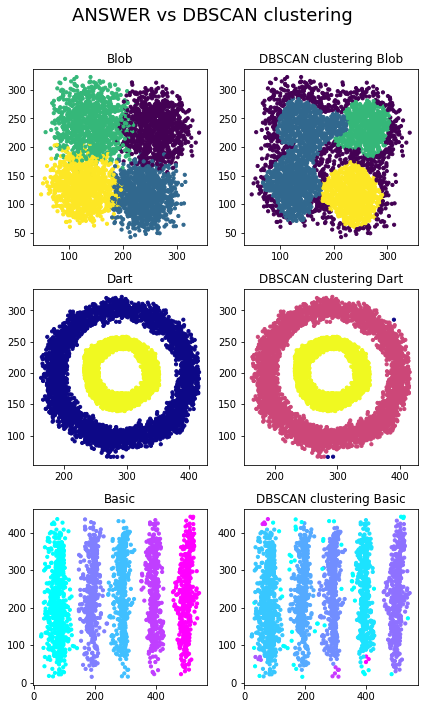

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(6,10))
fig.suptitle('ANSWER vs DBSCAN clustering\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "viridis")
axes[0,0].set_title("Blob");
axes[0,1].scatter(df_blob_DBScan['x'], df_blob_DBScan['y'], c=df_blob_DBScan['Cluster'], s=10, cmap = "viridis")
axes[0,1].set_title("DBSCAN clustering Blob");

axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "plasma")
axes[1,0].set_title("Dart");
axes[1,1].scatter(df_dart_DBScan['x'], df_dart_DBScan['y'], c=df_dart_DBScan['Cluster'], s=10, cmap = "plasma")
axes[1,1].set_title("DBSCAN clustering Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "cool")
axes[2,0].set_title("Basic");
axes[2,1].scatter(df_basic2_DBScan['x'], df_basic2_DBScan['y'], c=df_basic2_DBScan['Cluster'], s=10, cmap = "cool")
axes[2,1].set_title("DBSCAN clustering Basic");


plt.tight_layout()

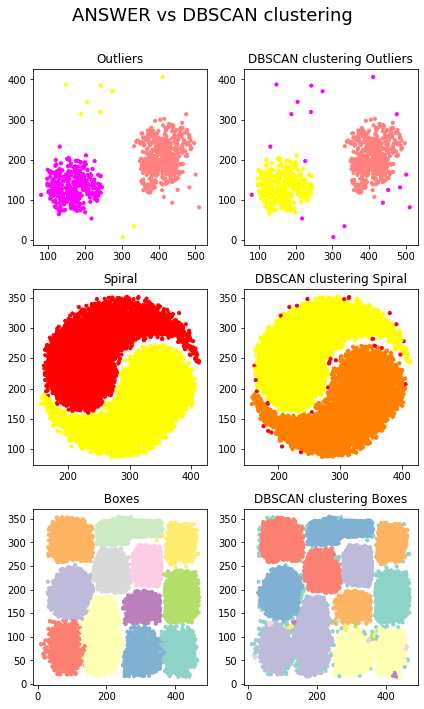

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(6,10))
fig.suptitle('ANSWER vs DBSCAN clustering\n', size = 18)

axes[0,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "spring")
axes[0,0].set_title("Outliers");
axes[0,1].scatter(df_outliers_DBScan['x'], df_outliers_DBScan['y'], c=df_outliers_DBScan['Cluster'], s=10, cmap = "spring")
axes[0,1].set_title("DBSCAN clustering Outliers");

axes[1,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "autumn")
axes[1,0].set_title("Spiral");
axes[1,1].scatter(df_spiral2_DBScan['x'], df_spiral2_DBScan['y'], c=df_spiral2_DBScan['Cluster'], s=10, cmap = "autumn")
axes[1,1].set_title("DBSCAN clustering Spiral");

axes[2,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title(" Boxes");
axes[2,1].scatter(df_boxes3_DBScan['x'], df_boxes3_DBScan['y'], c=df_boxes3_DBScan['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("DBSCAN clustering Boxes");

plt.tight_layout()

In [21]:

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

blob_silhouette_score = silhouette_score(df_blob_DBScan, y_DBScan_blob)

dart_silhouette_score = silhouette_score(df_dart_DBScan, y_DBScan_dart)

basic_silhouette_score = silhouette_score(df_basic2_DBScan, y_DBScan_basic)

outliers_silhouette_score = silhouette_score(df_outliers_DBScan, y_DBScan_outliers)

spiral2_silhouette_score = silhouette_score(df_spiral2_DBScan, y_DBScan_spiral2)

boxes3_silhouette_score = silhouette_score(df_boxes3_DBScan, y_DBScan_boxes3)

# Print silhouette scores for all datasets
print("Silhouette Scores:")
print(f"Blob: {blob_silhouette_score}")
print(f"Dart: {dart_silhouette_score}")
print(f"Basic: {basic_silhouette_score}")
print(f"Outliers: {outliers_silhouette_score}")
print(f"Spiral: {spiral2_silhouette_score}")
print(f"Boxes: {boxes3_silhouette_score}")



Silhouette Scores:
Blob: 0.24668344820443544
Dart: 0.10051913664144643
Basic: 0.08964820647879305
Outliers: 0.6830784635936468
Spiral: 0.32854464131251854
Boxes: 0.26321437918987783


In [25]:
from sklearn.metrics import adjusted_rand_score

# Extract the true labels from the 'Cluster' column
y_true_blob = blob_df['color'].values  # True labels for the Blob dataset
y_true_dart =dart_df['color'].values  # True labels for the Dart dataset
y_true_basic = basic2_df['color'].values  # True labels for the Basic dataset
y_true_outliers =outliers_df['color'].values  # True labels for the Outliers dataset
y_true_spiral2 =spiral2_df['color'].values  # True labels for the Spiral dataset
y_true_boxes3 = boxes3_df['color'].values  # True labels for the Boxes dataset

# Calculate ARI for all datasets
blob_ari = adjusted_rand_score(y_true_blob, y_DBScan_blob)
dart_ari = adjusted_rand_score(y_true_dart, y_DBScan_dart)
basic_ari = adjusted_rand_score(y_true_basic, y_DBScan_basic)
outliers_ari = adjusted_rand_score(y_true_outliers, y_DBScan_outliers)
spiral2_ari = adjusted_rand_score(y_true_spiral2, y_DBScan_spiral2)
boxes3_ari = adjusted_rand_score(y_true_boxes3, y_DBScan_boxes3)

# Print ARI for all datasets
print("Adjusted Rand Index Scores:")
print(f"Blob: {blob_ari}")
print(f"Dart: {dart_ari}")
print(f"Basic: {basic_ari}")
print(f"Outliers: {outliers_ari}")
print(f"Spiral: {spiral2_ari}")
print(f"Boxes: {boxes3_ari}")



Adjusted Rand Index Scores:
Blob: 0.44389872629771215
Dart: 0.9991120163282786
Basic: 0.9705651585847082
Outliers: 0.9761211397718728
Spiral: 0.9926903913769507
Boxes: 0.9050569931807706


C:\Users\ASUS\AppData\Local\Temp/ipykernel_4536/1899949397.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Adjusted Rand Index", y="Dataset", data=ari_df, palette="viridis")


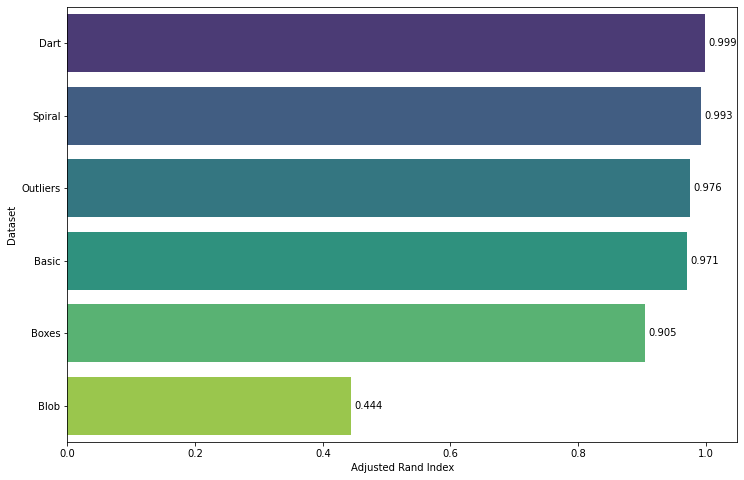

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ARI scores for all datasets
ari_scores = {
    "Blob": blob_ari,
    "Dart": dart_ari,
    "Basic": basic_ari,
    "Outliers": outliers_ari,
    "Spiral": spiral2_ari,
    "Boxes": boxes3_ari
}

# Create a DataFrame for better visualization
ari_df = pd.DataFrame(list(ari_scores.items()), columns=["Dataset", "Adjusted Rand Index"])

# Sort the ARI scores in descending order
ari_df = ari_df.sort_values(by="Adjusted Rand Index", ascending=False)

# Set up the plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Adjusted Rand Index", y="Dataset", data=ari_df, palette="viridis")

# Add title and labels
#plt.title("Adjusted Rand Index Scores for DBSCAN on Different Datasets")
plt.xlabel("Adjusted Rand Index")
plt.ylabel("Dataset")

# Annotate the bars with the ARI values
for i, v in enumerate(ari_df["Adjusted Rand Index"]):
    ax.text(v + 0.005, i, f"{v:.3f}", va="center", color="black")

# Show plot
plt.show()
